---
title: Infodemics
math: 
    '\abs': '\left\lvert #1 \right\rvert' 
    '\norm': '\left\lvert #1 \right\rvert' 
    '\Set': '\left\{ #1 \right\}'
    '\set': '\operatorname{set}'    
    '\mc': '\mathcal{#1}'
    '\M': '\boldsymbol{#1}'
    '\R': '\mathsf{#1}'
    '\RM': '\boldsymbol{\mathsf{#1}}'
    '\op': '\operatorname{#1}'
    '\E': '\op{E}'
    '\d': '\mathrm{\mathstrut d}'
    '\SFM': '\operatorname{SFM}'
    '\utag': '\stackrel{\text{(#1)}}{#2}'
    '\uref': '\text{(#1)}'
    '\minimal': '\operatorname{minimal}'
---

## Problem formulation

Consider a communication network on a discrete set $V$ of nodes, where $\rho(S,A)$ denotes the maximum total multiple multicast rate from a set $S\subseteq V$ of source nodes to a set $A\subseteq V$ or sink nodes. Suppose a set of rumors with a sum rate $r\geq 0$ is multicast from an unknown source $S\in \mathcal{S}$ to a given set $A\subseteq V$, 

The problem is to detect inclusion-wise minimal sources

$$
\begin{align}
\mathcal{S}_r(A):=\minimal \Set{S\subseteq V\middle| \rho(S, A) \geq r}.
\end{align}
$$ (eq:S_r)

given that a rumor of rate $r> 0$ is received by $A\subseteq V$. Instead of finding all feasible sources above, we also consider finding one feasible source or

$$
\begin{align}
\kappa_r(A) &:= \min\Set{\abs{S}\middle| S\in \mathcal{S}(A, r)} && \text{for $r\geq 0$}\\
&= \max_{S\subseteq V: \rho(S, A)\geq r} \abs{S}
\end{align}
$$ (eq:kappa_r)
$$
\begin{align}
\rho_k(A) &:= \max\Set{r\geq 0: S\in \mathcal{S}(A, r), \abs{S}\leq k} && \text{for $k \in \Set{0,\dots,\abs{V}}$.}\\
&= \max_{S\subseteq V: \abs{S}=k} \rho(S, A)
\end{align}
$$ (eq:rho_k)

$\kappa_r(A)$ is the smallest size of a feasible source and $\rho_k(A)$ is the maximum multicast rate of a source of limited size.

The problem formulation is illustrated below:

::::{prf:example}

Consider the butterfly network on $V:=[6]$ with independent noiseless channels from node $u\in V$ to $w\in V$ with capacity 

$$
\begin{align}
\lambda_{uw} := 
\begin{cases}
1 & (u,w)\in \mc{E}:=\Set{(1,3),(1,5),(2,3),(2,6),(3,4),(4,5),(4,6)}\\
0 & \text{otherwise.}
\end{cases}
\end{align}
$$

For $A:=\Set{5,6}$, the multiple multicast rate from $S\in 2^V$ to $A$ is

$$
\begin{align}
\rho(S, A) &= 
\begin{cases}
0 & S\subseteq \Set{5,6}\\
2 & \Set{1,2}\subseteq S\\
1 & \text{otherwise.}
\end{cases}
\end{align}
$$

The source $\Set{1,2}$ achieves a rate of $2$ by network coding, while other sources in $\Set{1,2,3,4}$ achieve a rate of $1$ by routing.  It follows that

$$
\begin{alignat}{4}
\mathcal{S}_r(A)=
\begin{cases}
\Set{\emptyset} & r=0\\
\Set{\Set{u}|1\leq u\leq 4} & r\in (0,1]\\
\Set{1,2} & r\in (1,2]\\
\emptyset & \text{otherwise}
\end{cases}
&\kern2em\text{and}\kern2em&
\kappa_r(A) &= 
\begin{cases}
0 & r=0\\
1 & r\in (0,1]\\
2 & r\in (1,2]\\
2 & \text{otherwise}
\end{cases}
\end{alignat}
$$

and $\rho_k(A) = \max\Set{k,2}$. In particular, the source $\Set{1,2}$ can be identified with no ambiguity if the total rate of the rumor exceeds $1$.

::::

In [1]:
%reload_ext itikz

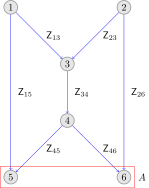

In [62]:
%%itikz --scale 2 --implicit-pic --file-prefix butterfly- --tikz-libraries {fit} --temp-dir
\tikzstyle{dot}=[circle,draw=gray!80,fill=gray!20,thick,inner 
sep=2pt,minimum size=11pt]
\tikzstyle{edge}=[->,draw=blue]
\tikzstyle{point}=[draw,circle,minimum size=.2em,inner sep=0, outer sep=.2em]
\tikzstyle{receiver}=[blue,fill,fill opacity=0.1]

\path (0,0) node (n1) [dot] {$1$} -- ++(2,0) node[dot] (n2) {2} -- ++(-1,-1) node[dot] (n3) {3} -- ++(0,-1) node[dot] (n4) {4}
-- ++(-1,-1) node[dot] (n5) {5} -- ++(2,0) node[dot] (n6) {6};

\foreach \u/\w in {1/3,2/3,3/4,4/5,4/6,1/5,2/6} {
    \draw[edge] (n\u) to node[label=right:$\mathsf{Z}_{\u\w}$] {} (n\w);
}

\node[draw=red,fit=(n5) (n6),label=right:$A$] (A) {};

As in the above example, the multiple multicast rate $\rho(S,A)$ is computed from a network links model such as a weighted directed graph. To capture a general information network model beyond graphs, we consider the min-cut formula for a general polylinking network [Goemans et al. (2012)](https://doi.org/10.1007/s10107-011-0446-2):

::::{prf:definition}

The multiple multicast rate 

$$
\begin{align}
\rho(S,A) &:= \min_{B\subseteq V: S\subseteq B\not\supseteq A} \lambda(B,V\setminus B)
\end{align}
$$ (eq:rho)

where $\lambda:V^2\mapsto \mathbb{R}_+$ is a polylinking function satisfying

$$
\begin{align}
\lambda(\emptyset,B) &= \lambda(B,\emptyset) = 0 \text{ and } \lambda(B',C') \leq \lambda(B, C) && \forall B'\subseteq B\in 2^V, C\subseteq C'\in 2^V\\
\end{align}
$$ (eq:normalized-monotonic)
$$
\begin{align}
\sum_{i=1}^2 \lambda(B_i, C_i) &\geq \lambda(B_1\cap B_2, C_1\cup C_2) + \lambda(B_1\cup B_2, C_1\cap C_2) && \forall B_1,B_2,C_1,C_2\in 2^V
\end{align}
$$ (eq:bisubmodular)

[](#eq:normalized-monotonic) means $\lambda$ is normalized and non-decreasing, and [](#eq:bisubmodular) is called bisubmodularity.

::::

The above formulation is motivated by the general max-flow min-cut result for the following deterministic channel model [Chan 2013](https://doi.org/10.1109/ISIT.2013.6620334) [Chan et al. 2013](https://doi.org/10.1109/ITW.2013.6691270).


::::{prf:example}

Let $\R{X}_u$ and $\R{Y}_u$ be the discrete the channel input and output of 

Consider a discrete memoryless deterministic channel $P_{\R{Y}_V|\R{X}_V}$ and an input distribution $\R{X}_V$ satisfying

\begin{align}
H(\R{Y}_V|\R{X}_V) &= 0 \\
H(\R{X}_V) &= \sum_{i\in V} H(\R{X}_i)
\end{align}

The linking function can be chosen as

\begin{align}
\lambda(B, C) &:= I(\R{X}_B\wedge \R{Y}_C|\R{X}_{V\setminus B}) \kern2em \text{for $B,C\subseteq V$}\\
&= H(\R{Y}_C|\R{X}_{V\setminus B}) = \underbrace{H(\R{Y}_C, \R{X}_{V\setminus B})}_{(a)} - \underbrace{\sum_{u\in V\setminus B} H(\R{X}_u)}_{(b)}.
\end{align}

[](#eq:bisubmodular) follows immediately from the submodularity of the entropy in (a) and modularity of the sum in (b):[^based-polymatroid]

\begin{align}
\sum_{i=1}^2 H(\R{Y}_{C_i}, \R{X}_{V\setminus B_i})
& \geq H(\R{Y}_{C_1\cup C_2}, \R{X}_{V\setminus (B_1\cap B_2)})
+ H(\R{Y}_{C_1\cap C_2}, \R{X}_{V\setminus (B_1\cup B_2)})
\end{align}
\begin{align}
\sum_{i=1}^2 \sum_{u\in V\setminus B_i} H(\R{X}_u)
&= \sum_{u\in V\setminus (B_1\cup B_2)} H(\R{X}_u) + \sum_{u\in V\setminus (B_1\cap B_2)} H(\R{X}_u).
\end{align}

The directed network links model is the special case when

\begin{align}
\lambda(B,C) &:= \sum_{u\in B, w\in C} \lambda_{uw}
\end{align}

where $\lambda_{uw}$ is the capacity of an independent noiseless channel from $u\in V$ to $w\in V$.

::::

[^based-polymatroid]: polylinking system is equivalent to based polymatroid [Shrijver 1979](https://doi.org/10.1016/0095-8956(79)90011-X), i.e., $\lambda(B,C)=f(C|g(B))$ for some bijection $g:V\to V'$ with $V'\cap V=\emptyset$, and a normalized, non-decreasing submodular function $f:2^{V\cup V'}\to \mathbb{R}_+$.

## Main results

The min-cut formulation [](#eq:rho) for the multicast rate can be computed in strongly polynomial time even though there are exponentially many feasible solution. This can be done by applying a strongly polynomial-time algorithm for submodular function minimization (SFM) over a lattice family, i.e., computing $\min_{B\in\mc{F}} f(B)$ and its inclusionwise minimum and maximum solutions where, for all $B,C\in \mc{F}$, $f(B)+f(C) \geq f(B\cup C)+f(B\cap C)$ and $B\cup C, B\cap C\in \mc{F}$. Denote the time complexity by $\SFM(n)$, which is strongly polynomial in $n:=\log \abs{\mc{F}}$ by [Iwata et al. 2001](https://doi.org/10.1145/502090.502096).

::::{prf:lemma}
:label: lem:rho

$\rho(S,A)$ in [](#eq:rho) can be computed in time $O(\abs{A} \SFM(\abs{V\setminus S}))$ where $\SFM(n)$ is the strongly polynomial running time for submodular function minimization with a ground set of size $n$.

::::

::::{prf:proof}
:nonumber:

[](#eq:rho) can be rewritten as

\begin{align}
\rho(S,A) &= \min_{u\in A} \min_{C\subseteq V\setminus S: u\in C} \lambda(C, V\setminus C)
\end{align}

which is obtained by setting $C=V\setminus B$ in [](#eq:rho) and translating the constraint on $B$ to the cosntraint on $C$. Since $\lambda(V\setminus C, C)$ is submodular in $C$ by [](#eq:bisubmodular), the inner minimization can be computed as an SFM over a lattice family $C-u\in 2^{(V\setminus S)-u}$ of ground set $(V\setminus S)$. The overall minimization can be solved in $\abs{A}$ such SFM, one for each $u\in A$ in the outer minimization. This gives the desired complexity.

::::

::::{prf:theorem}

In the non-trivial case $\rho(V,A)\geq r$, a solution to [](#eq:S_r) can be obtained in time $O(\abs{V} \abs{A} \SFM(\abs{V}))$.

::::

::::{prf:proof}
:nonumber:

Consider the backward elimination algorithm: 

:::{code} python
:linenos:
:emphasize-lines: 4

def feasible_source(A):
    S = V
    for u in V:
        if rho(S-u, A)>=r: S=S-u
    return S
:::

Correctness follows from the fact that $\rho(S,A)$ is non-decreasing in $S$. The complexity follows from the fact the highlighted is repeated at most $O(\abs{V})$ times and each time involves $O(\abs{A}\SFM(\abs{V}))$ computations by [](#lem:rho).

::::

::::{prf:theorem}

$\rho_k(A)$ can be computed in time $O(\abs{V}^k \SFM(\abs{V})$.

::::

::::{prf:proof}
:nonumber:

The complexity can be achieved by checking $\rho(S,A)$ for all $S\subseteq V:\abs{S}=k$. The complexity follows from the fact that there are $O(\abs{V}^k)$ possible $S$ and each computation of $\rho(S,A)$ takes $O(\abs{A} \SFM(\abs{V}))$ by [](#lem:rho).

::::

::::{prf:theorem}

$\rho_k(A)$ can be upper bounded by

\begin{align}
\rho_k(A) &\leq \min_{B\subseteq V: B\not\supseteq A, \abs{B}\geq k} \lambda(B,V\setminus B).
\end{align}

::::

::::{prf:proof}
:nonumber:

By [](#eq:rho_k) and [](#eq:rho),

\begin{align}
\rho_k(A) &\utag{a}= \max_{S\subseteq V: \abs{S}\utag{i}\leq k} \min_{B\subseteq V: S\utag{iii}\subseteq B\not\supseteq A} \lambda(B,V\setminus B)\\
&\utag{b}\leq \min_{B\subseteq V: B\not\supseteq A, \abs{B}\utag{ii}\geq k} \lambda(B,V\setminus B).
\end{align}

To derive the above upper bound:
- Without loss of optimality, change the inequality $\uref{i}$ to equality, i.e., with the outer maximization in $\uref{a}$ changed to $\max_{S\subseteq V: \abs{S}=k}$.
- Now with $\abs{S}=k$, $S\subseteq B$ implies $\uref{ii}$ that $\abs{B}\geq k$. Impose the additional inequality $\uref{ii}$ to the inner minimization in $\uref{a}$.
- Drop $\uref{iii}$ so that the inner minimization in $\uref{a}$ no longer depend on $S$, in which case the outer maximization can also be dropped, which results in $\uref{b}$ as desired.

::::

The upper bound above is a size-constrainted SFM [Nagano](), which is NP-hard to solve for an arbitrary $k$. We conjecture that $\rho_k$ is also NP-hard to solve.

::::{prf:conjecture}

Both $\kappa_r(A)$ and $\rho_k(A)$ for an arbitrary $k$ are NP-hard.

::::

\begin{align}
\mc{U}_m &:= \bigcup_{x\geq 0} \mc{U}_m(x) \kern2em \text{where}\\
\mc{U}_m(x) &:= \minimal \arg\min_{B\subseteq V: B\not\supseteq A, \abs{B}\geq m} \lambda(B,V\setminus B) - x\abs{B}.
\end{align}

where $B^*$ can be computed in $O(\SFM(\abs{V}))$ as a solution to 

\begin{align}
\min_{B\subseteq V:B\not\supseteq A} \lambda(B, V\setminus B) - x\abs{B}
\end{align}



## Problem Formulation

To capture a general notion of information flow in a network of discrete set $V$ of nodes, we consider a cyclic (poly)-linking network [](https://doi.org/10.1109/ITW.2013.6691270)[](https://doi.org/10.1109/ISIT.2013.6620334)[](https://doi.org/10.1109/ISIT.2012.6283513) characterized by a polylinking function $\lambda:V^2\to \mathbb{R}^+$ [Goemans et al. (2012)](https://doi.org/10.1007/s10107-011-0446-2).

::::{prf:example}

A possible choice of $\lambda$ satisfying (F1-3) in Proposition 2 of [Goemans et al. (2012)](https://doi.org/10.1007/s10107-011-0446-2) is

$$
\begin{align}
\lambda(B,C) &:=I(\R{X}_B\wedge \R{Z}_C|\R{X}_{V\setminus B}) && \text{for $B,C\subseteq V$},
\end{align}
$$

where $\R{X}_u$ and $\R{Z}_u$ are discrete input and output random variables of node $u\in V$ satisfying the condition

$$
\begin{align}
H(\R{Z}_V|\R{X}_V) &= 0\\
H(\R{X}_V) &= \sum_{u\in V} H(\R{X}_i)\\
H(\R{X}_u|\R{Z}_u) &= 0 && \forall u\in V.
\end{align}
$$


::::



Given that a rumor of size $r$ has spread to a subset $A\subset V$ of nodes, one can consider the set of feasible sources as the solution to 

$$
\operatorname{minimal} \Set{S\subseteq A \middle| \min_{B\subseteq V: S\subseteq B\not\supseteq A} \lambda(B,V\setminus B) \geq r}.
$$

To capture information flow in a network consisting of a discrete set $V$ of nodes, we generalize the SI model to use the following infection rate tuple:

::::{prf:definition} infection rate tuple

A rate tuple $\lambda_V:=(\lambda_u|u\in V)$ where $\lambda_u:2^V\to \mathbb{R}_+$ is normalized and monotonic iff

$$
\begin{align}
\lambda_u(\emptyset) &= 0\\
\lambda_u(B') &\leq \lambda_u(B) && \forall B'\subseteq B \subseteq V
\end{align}
$$ (infection-rate-tuple)

::::

::::{prf:example} Information flow

A possible choice of the rate tuple is 

$$
\lambda_u(B) := I(\R{X}_B\wedge \R{Y}_u|\R{X}_{V\setminus B}),
$$

where $\R{X}_u$ and $\R{Y}_u$ are discrete input and output random variables of node $u\in V$ such that $H(\R{X}_V)=\sum_{u\in V} H(\R{X}_u)$ and $H(\R{Y}_V|\R{X}_V)=0$.[^sub] For graphical models where $\lambda_{uw}$ denotes the weight of the edge $(u,w)$, we can set 

$$
\lambda_u(B) := \sum_{w\in B} \lambda_{uw}.
$$

::::

[^sub]: Submodularity follows from the submodularity of entropy and rewriting $\lambda_u(B)$ as $H(\R{Y}_u|\R{X}_{V\setminus B})=H(\R{Y}_u,\R{X}_{V\setminus B})+H(\R{X}_B)-H(\R{X}_V)$.

To define the SI model for infodemic, define the time for $u\in V$ to be infected by $B\subseteq V\setminus \Set{u}$ by the exponentially distributed random variable

$$
\R{T}_u(B) \sim \text{Exp}(\lambda_u(B))
$$ 

mutually independent over $u$ and $B$. Let $\R{U}(t)$ be the sequence of infected nodes at time $t\geq 0$, i.e., $\R{U}(t)=u^k$ means $u_i$ is the $i$-th first infected node by time $t$ for $i\in [k]$. Then, the infection times determine the sequence of infected node as follows:

::::{prf:definition} SI model beyond graphs
Given $\R{U}(\tau)=u^{k}$, for all $t>\tau$,

$$
\R{U}(t)=u^{k+1}  \iff u_{k+1} =\arg\min_{w\in V\setminus \set(u^k)} \R{T}_w(\set(u^k))
$$

where the setify function 

$$
\set(u^k):=\Set{u_i}_{i=1}^l
$$ 

turns the input sequence $u^k$ into an unordered set. 
::::

A unique choice of $u_{k+1}$ is possible because, almost surely, $\R{T}_w(\set(u^k))$'s are distinct.

The source detection problem is to find $\set(\R{U}(0))$ given $\set(\R{U}(\R{T}^{(k)}))=S$, where

$$
\R{T}^{(k)} = \inf\Set{t\geq 0| \abs{S(\R{U}(t))}=k},
$$ (eq:Tk)

namely, the time to infect the first $k$ nodes.

A standard approach is to find the maximum likelihood estimator. We propose to the following maximum likelihood estimator:

::::{prf:definition} Maximum likelihood source detection

Let

$$
\begin{align}
L_{S,t}(W) &:= P\left[\set(\R{U}(t))=S\middle|\set(\R{U}(0))=W\right],
\end{align}
$$ (eq:L)

be the likelihood probability of observing the set $S$ of infected node at time $t\geq 0$ given $W$ is the set of infected nodes at time $0$. The maximum likelihood estimate of $\set(\R{U}(0))$ is a solution to

$$
\begin{align}
\max_{W\in \mathcal{W}_S} E[L_{S,\R{T}}(W)]
\end{align}
$$ (eq:ML)

where $S\subseteq V$ is a given set of infected nodes observed at some independently chosen random time $\R{T}$, and $\mathcal{W}_S\subseteq 2^S$ is a set of hypotheses.

::::

The single-source detection problem corresponds to the case $\mathcal{W}_S=\Set{\Set{s}|s\in S}$. In this case, we will show that our proposal [](#eq:ML) can be more meaninful than the existing formulations below

$$
\begin{align}
\max_{s\in S} L_{S,\R{T}^{(k)}}(\Set{s})
\end{align}
$$ (ML:D)

$$
\begin{align}
\max_{s\in S} \sup_{t\geq 0} L_{S,t}(\Set{s})
\end{align}
$$ (ML:I)

where $L_{S,t}$ and $\R{T}^{(k)}$ are defined in [](eq:L) and [](#eq:Tk) respectively.

### Main results

The likelihood probability can be computed by summing the probability of all possible infection sequences:

\begin{align}
L_{S,t}(W) &= \sum_{u^k\in \Pi_{S|W}} P\left[\R{U}(t)=u^k|\set(\R{U}(0))=W\right]
\end{align}

where $\Pi_{S|W}$ is the set of permitted infection sequence $u^k$ from $W$ to $S$ satisfying

$$
\begin{align}
u_l &\in S\setminus (W\cup \set(u^{l-1})) \text{ and }
\lambda_{W\cup \set(u^{l-1}),u_l} > 0 && \forall l\in [k].
\end{align}
$$

To compute the probability of each permitted infection sequence, define

\begin{align}
f_{W,u^k}^{(l)}(t)&:=
P\left[\R{U}(t)=u^k_{l}|\set(\R{U}(0))=W\cup \Set{u^{l-1}}\right]
\end{align}

$f_{W,u^k}^{(l)}(t)$ can be computed recursively due to the following recurrence formula:

::::{prf:proposition}

$L_{S,t}(W) = \sum_{u^k\in \Pi_{S|W}} f_{W,u^k}^{(1)}(t)$ where 

\begin{align}
f_{u^k|W}^{(l)}(t) &=
\begin{cases}
\left(f_{u^k|W}^{(l+1)} * g_{u^l|W}\right)(t) && l\in [k]\\
1 && l=k+1
\end{cases}\\
g_{u^l|W}(t) &:= \left.p_{\R{T}_{B, u_l}}(t)\prod_{u\in (V\setminus B)\setminus \Set{u_l}} P[\R{T}_{B,u}>t]\right|_{B=W\cup\set(u^{l-1})}.
\end{align}

::::

::::{prf:proof}

It suffices to consider $W:=\Set{u_0}$ by contracting all nodes in $W$ into a single node $u_0$. For $u^k\in \Pi_{S|W}$, we have

\begin{align}
P\left[\R{U}(t)=u_l^k\middle |\R{U}(0)=u^{l-1}_0\right]
&= 
\int_{\tau=0}^t P\left[\R{U}(t)=u_l^k\middle |\R{U}(\tau)=u^{l}_0\right]\times \\
&\quad \times P\left[\R{T}_{\set(u^{l-1}_0),u}>\tau, u\in V\setminus \set(u^l_0)\right]dP_{\R{T}_{\set(u^{l-1}_0),u_l}}(\tau).
\end{align}

::::